In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [652]:
# pd.set_option('display.max_rows', None)

In [653]:
# comunudades auonomas 1
df_madrid = pd.read_csv('viajeros_nacional.csv', sep= ';',  encoding='latin-1')

In [654]:
df_madrid['Viajeros y pernoctaciones'].unique()

array(['Viajero', 'Pernoctaciones'], dtype=object)

In [655]:
# Comprobar los nulos que quedan
df_madrid.isna().sum()

Viajeros y pernoctaciones    0
Puntos turísticos            0
Residencia                   0
Periodo                      0
Total                        0
dtype: int64

In [656]:
df_madrid['Total'] = pd.to_numeric(df_madrid['Total'], errors='coerce')


In [657]:
df_madrid.dtypes

Viajeros y pernoctaciones     object
Puntos turísticos             object
Residencia                    object
Periodo                       object
Total                        float64
dtype: object

In [658]:
# cambiar tipo fecha
df_madrid['Periodo'] = pd.to_datetime(df_madrid['Periodo'], format='%YM%m')




In [659]:
#  Elimina el formato hora
df_madrid['Periodo'] = df_madrid['Periodo'].dt.strftime('%Y-%m-%d')


In [660]:
df_madrid['Periodo'].min()

'2005-01-01'

In [661]:
df_madrid.head()

,Viajeros y pernoctaciones,Puntos turísticos,Residencia,Periodo,Total
0,Viajero,28079 Madrid,Residentes en España,2023-06-01,400.401
1,Viajero,28079 Madrid,Residentes en España,2023-05-01,370.883
2,Viajero,28079 Madrid,Residentes en España,2023-04-01,368.129
3,Viajero,28079 Madrid,Residentes en España,2023-03-01,396.724
4,Viajero,28079 Madrid,Residentes en España,2023-02-01,367.715


In [662]:
df_madrid = df_madrid.sort_values(by='Periodo', ascending=True)


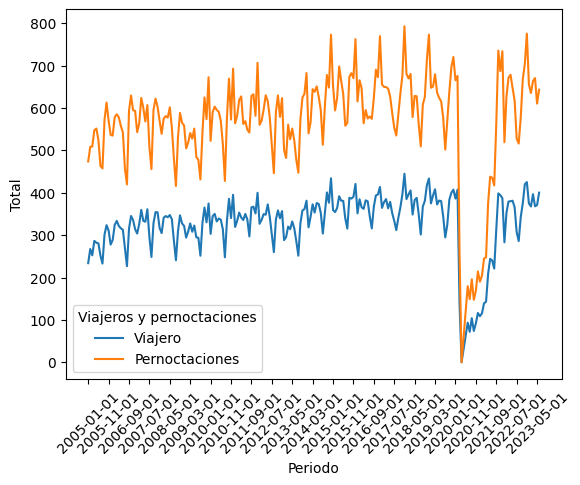

In [663]:
# plot de viajeros y pernoctaciones
sns.lineplot(data=df_madrid, x='Periodo', y='Total', hue='Viajeros y pernoctaciones')
plt.xticks(plt.xticks()[0][::10], rotation=45)

plt.show()


In [664]:
df_madrid.dtypes

Viajeros y pernoctaciones     object
Puntos turísticos             object
Residencia                    object
Periodo                       object
Total                        float64
dtype: object

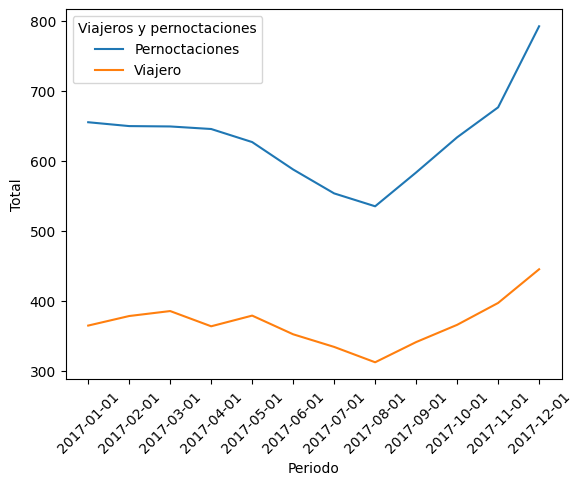

In [665]:
# cambiar el año para granularidad
year = 2017
df_year = df_madrid[df_madrid['Periodo'].str.contains(str(year))]
sns.lineplot(data=df_year, x='Periodo', y='Total', hue='Viajeros y pernoctaciones')
plt.xticks(rotation=45)
plt.show()



In [666]:
df_madrid = df_madrid.dropna(subset=['Total'])



In [667]:
df_madrid['Viajeros y pernoctaciones'].unique()

array(['Viajero', 'Pernoctaciones'], dtype=object)

In [668]:
df_madrid.head()


,Viajeros y pernoctaciones,Puntos turísticos,Residencia,Periodo,Total
221,Viajero,28079 Madrid,Residentes en España,2005-01-01,233.903
443,Pernoctaciones,28079 Madrid,Residentes en España,2005-01-01,473.888
442,Pernoctaciones,28079 Madrid,Residentes en España,2005-02-01,508.455
220,Viajero,28079 Madrid,Residentes en España,2005-02-01,267.427
219,Viajero,28079 Madrid,Residentes en España,2005-03-01,252.365


In [669]:
# Divide el dataframe original en dos dataframes
df_viajeros = df_madrid[df_madrid['Viajeros y pernoctaciones'] == 'Viajero'][['Periodo', 'Total']]
df_pernoctaciones = df_madrid[df_madrid['Viajeros y pernoctaciones'] == 'Pernoctaciones'][['Periodo', 'Total']]

## Timeseries analisis | division de values unicos


In [670]:
df_pernoctaciones.head()

,Periodo,Total
443,2005-01-01,473.888
442,2005-02-01,508.455
441,2005-03-01,509.098
440,2005-04-01,547.621
439,2005-05-01,551.576


In [671]:
df_pernoctaciones['Total'].max()

792.947

In [672]:
df_viajeros.head()

,Periodo,Total
221,2005-01-01,233.903
220,2005-02-01,267.427
219,2005-03-01,252.365
218,2005-04-01,286.489
217,2005-05-01,282.161


In [673]:
# PASAR LA COLUMNA A DATETIME  df_pernoctaciones
df_pernoctaciones['Periodo'] = pd.to_datetime(df_pernoctaciones['Periodo'])
# PASAR LA COLUMNA A DATETIME  df_viajeros
df_viajeros['Periodo'] = pd.to_datetime(df_viajeros['Periodo'])

In [674]:
print(df_pernoctaciones['Periodo'].max())
print(df_pernoctaciones['Periodo'].min())

2023-06-01 00:00:00
2005-01-01 00:00:00


In [675]:
print(df_viajeros['Periodo'].max())
print(df_viajeros['Periodo'].min())

2023-06-01 00:00:00
2005-01-01 00:00:00


In [676]:
# Generar columna index con formato
fechas_p = pd.date_range(start=df_pernoctaciones['Periodo'].min(), periods=220, freq='MS')

In [677]:
fechas_v = pd.date_range(start=df_viajeros['Periodo'].min(), periods=220, freq='MS')

In [678]:
print(fechas_p)
print(fechas_v)

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', length=220, freq='MS')
DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', length=220, freq='MS')


In [679]:
len(fechas_p)

220

In [680]:
df_viajeros['Periodo'] = fechas_v

In [681]:
df_pernoctaciones['Periodo'] = fechas_p


In [682]:
df_pernoctaciones.set_index('Periodo', inplace=True)

In [683]:
df_viajeros.set_index('Periodo', inplace=True)


In [684]:
df_pernoctaciones.head()

,Total
Periodo,
2005-01-01,473.888
2005-02-01,508.455
2005-03-01,509.098
2005-04-01,547.621
2005-05-01,551.576


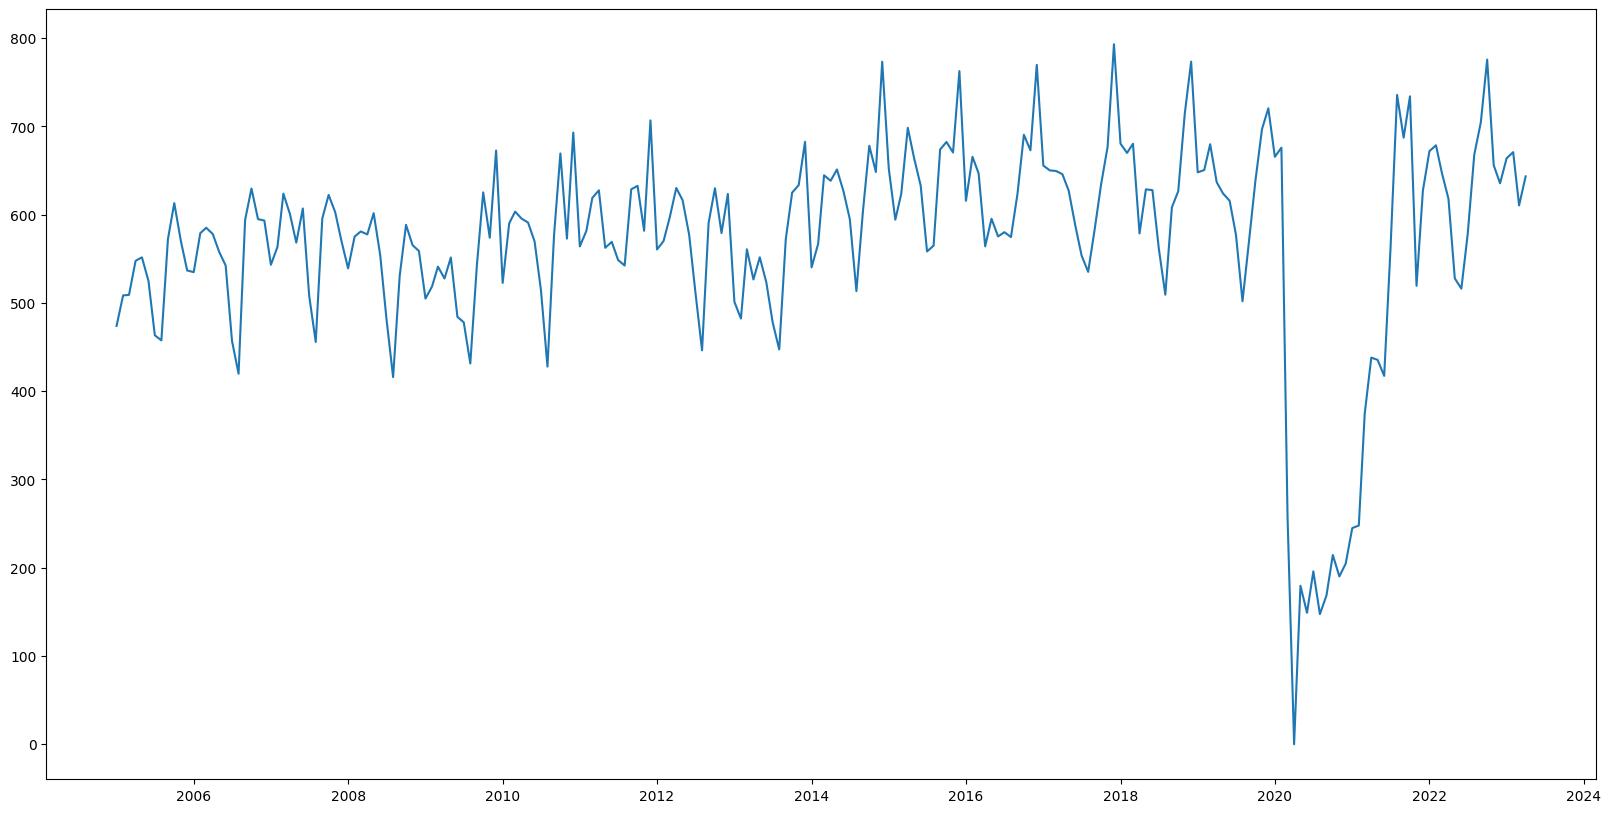

In [685]:
plt.figure(figsize=(20,10))
plt.plot(df_pernoctaciones);

In [686]:
# valor de P_pernoc

result_p = adfuller(df_pernoctaciones['Total'])
result_p[1]

0.0008187371111526778

In [687]:
if result_p[1] < 0.05:
    print("Rechazo h. nula, por lo tanto es estacionaria")
else: 
    print("Acepto h. nula, por lo tanto no es estacionaria")

Rechazo h. nula, por lo tanto es estacionaria


In [688]:
np.log(df_pernoctaciones['Total'])


c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Periodo
2005-01-01    6.160971
2005-02-01    6.231377
2005-03-01    6.232641
2005-04-01    6.305583
2005-05-01    6.312780
                ...   
2022-12-01    6.454359
2023-01-01    6.498005
2023-02-01    6.508417
2023-03-01    6.414118
2023-04-01    6.466617
Name: Total, Length: 220, dtype: float64

In [689]:
df_viajeros.head()

,Total
Periodo,
2005-01-01,233.903
2005-02-01,267.427
2005-03-01,252.365
2005-04-01,286.489
2005-05-01,282.161


In [690]:
# valor de P

result_v = adfuller(df_viajeros['Total'])
result_v[1]

0.0021496386662418843

In [691]:
if result_v[1] < 0.05:
    print("Rechazo h. nula, por lo tanto es estacionaria")
else: 
    print("Acepto h. nula, por lo tanto no es estacionaria")

Rechazo h. nula, por lo tanto es estacionaria


In [692]:
result_v

(-3.884795333844465,
 0.0021496386662418843,
 12,
 207,
 {'1%': -3.4623415245233145,
  '5%': -2.875606128263243,
  '10%': -2.574267439846904},
 2050.4474639482087)

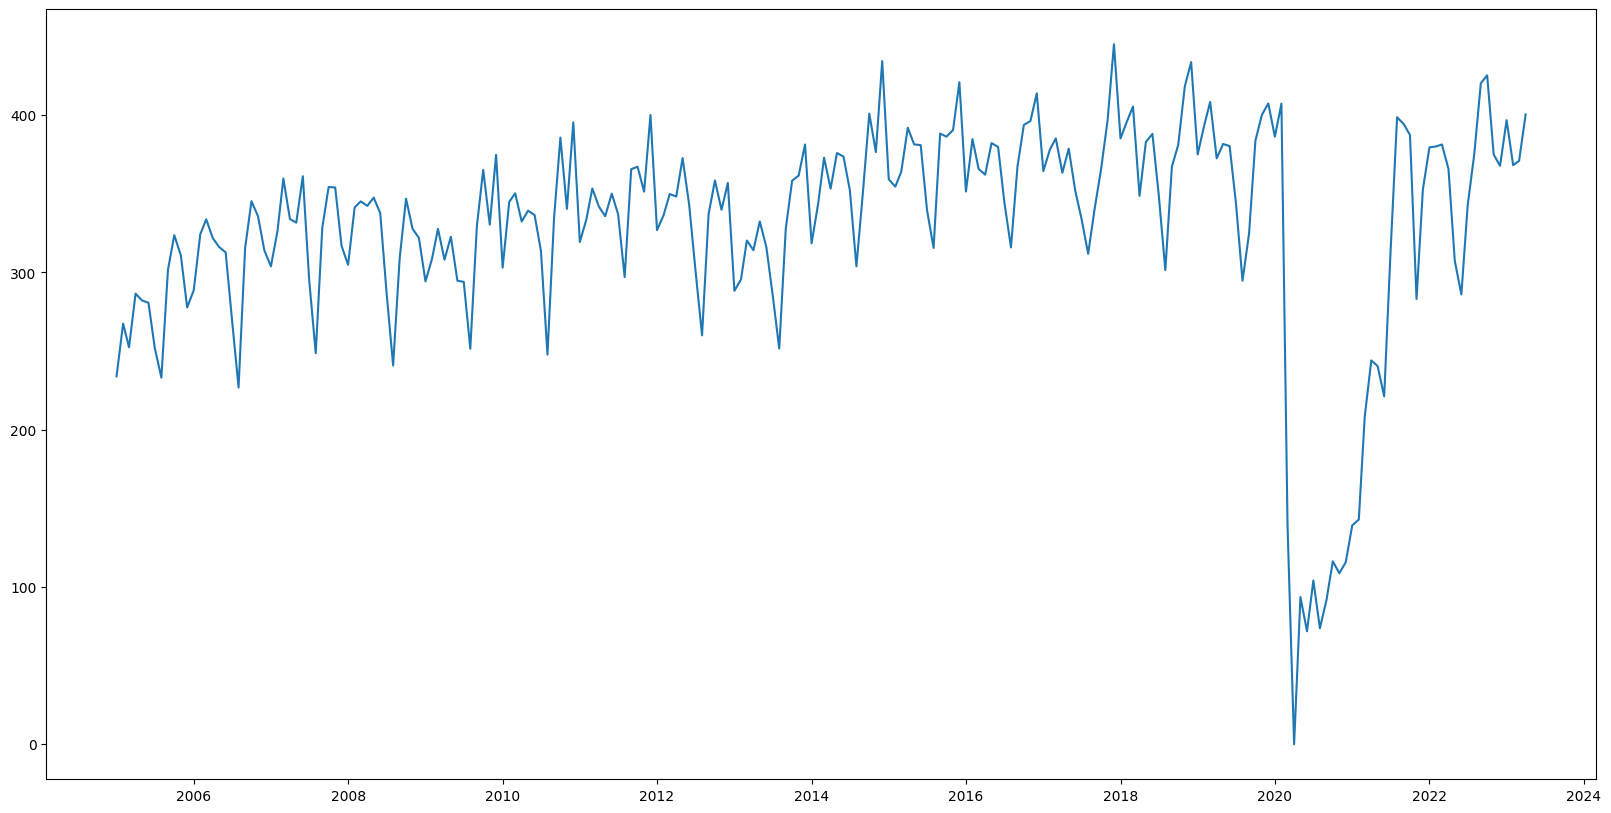

In [693]:
plt.figure(figsize=(20,10))
plt.plot(df_viajeros);

## Forecasting pernoctaciones

In [694]:
len(df_pernoctaciones)

220

In [695]:
len(df_pernoctaciones)

220

In [696]:
# entrena con el 70% | test 30%
train = df_pernoctaciones.iloc[:154,]
test = df_pernoctaciones.iloc[154:,]

In [697]:
print(train.shape)
print(test.shape)

(154, 1)
(66, 1)


In [698]:
from pmdarima.arima import auto_arima, ARIMA

In [699]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1710.746, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1706.062, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1692.541, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1708.787, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1690.954, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1670.377, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1704.113, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1670.334, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1698.257, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1671.454, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1670.936, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1670.6

In [700]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   m = 12,
                   stationary=False,
                   trace=True)

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1530.555, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1710.746, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1575.380, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1629.830, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1708.787, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1557.645, Time=0.40 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=1532.494, Time=1.16 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1532.486, Time=1.33 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1538.792, Time=0.67 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1531.351, Time=0.40 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1546.284, Time=0.47 sec
 ARIMA(2,1,1)(1

In [701]:
print(y_pred)

[616.73294 589.42856 650.21058 609.9311  559.16999 756.85655 582.25263
 673.63827 613.5878  664.19402 596.52088 545.41599 524.57145 661.9745
 596.69694 295.80637 632.48437 511.36531 599.81642 583.00565 426.39008
 531.71004 660.76649 567.60146 561.35161 674.67692 547.59833 545.09351
 588.72817 476.56232 759.5244  571.16847 554.91122 429.55484 642.39885
 651.14297 627.49233 637.91558 543.99408 760.88181 492.4832  614.81496
 590.85325 663.78433]


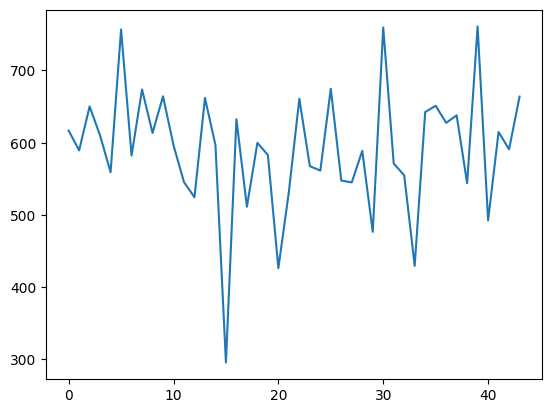

In [702]:
plt.plot(y_pred)

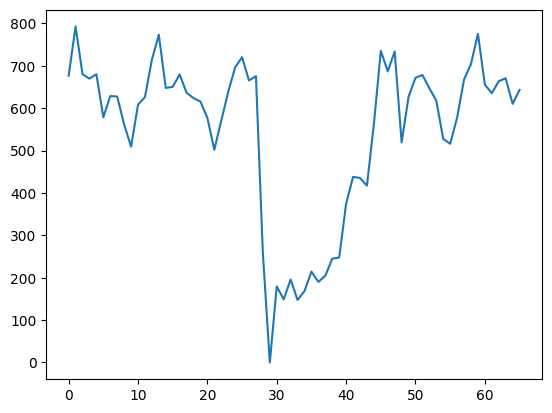

In [703]:
plt.plot(test.values)

## Random Forest

In [704]:
# Restaura la columna "Periodo" y elimina el índice actual
df_pernoctaciones.reset_index(inplace=True)


In [705]:

# Convierte la columna "Periodo" en formato de fecha
df_pernoctaciones['Periodo'] = pd.to_datetime(df_pernoctaciones['Periodo'])


In [706]:
# Extrae las columnas de mes, año y día
df_pernoctaciones['Mes'] = df_pernoctaciones['Periodo'].dt.month
df_pernoctaciones['Año'] = df_pernoctaciones['Periodo'].dt.year
df_pernoctaciones['Día'] = df_pernoctaciones['Periodo'].dt.day


In [707]:
df_pernoctaciones.head()

,Periodo,Total,Mes,Año,Día
0,2005-01-01,473.888,1,2005,1
1,2005-02-01,508.455,2,2005,1
2,2005-03-01,509.098,3,2005,1
3,2005-04-01,547.621,4,2005,1
4,2005-05-01,551.576,5,2005,1


In [708]:
X = df_pernoctaciones.drop(['Total', 'Periodo'], axis=1)
y = df_pernoctaciones['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [709]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [710]:

y_pred = rf.predict(X_test)


In [711]:
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')


MSE: 2234.97


In [712]:
len(y_pred)

44

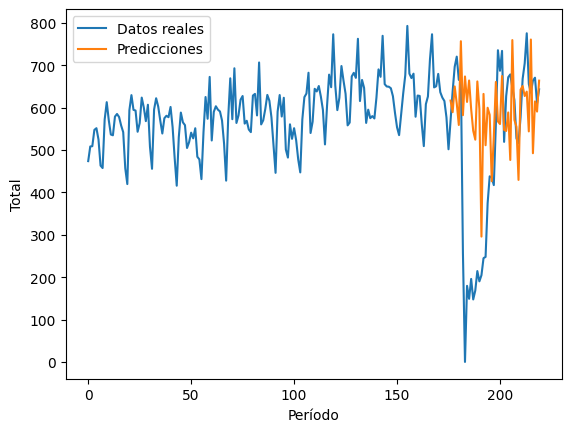

In [713]:
# Pueba de visualizacion 1

data = pd.DataFrame({'Datos reales': df_pernoctaciones['Total'], 'Predicciones': pd.Series(y_pred, index=df_pernoctaciones.index[-len(y_pred):])})

data.plot()

plt.xlabel('Período')
plt.ylabel('Total')

plt.show()


## Reentreno sin la crisis covid

In [714]:

# Df sin la crisis
df_pernoctacion_cortado = df_pernoctaciones.loc[df_pernoctaciones['Año'] < 2020]


In [715]:
X = df_pernoctacion_cortado.drop(['Total', 'Periodo'], axis=1)
y = df_pernoctacion_cortado['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestRegressor(n_estimators=100, random_state=0)

rf.fit(X_train, y_train)
y_pred_cortado = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_cortado)

print(f'MSE: {mse:.2f}')


MSE: 830.24


In [716]:
len(y_pred_cortado)

36

In [717]:
# Volver a cambiar el index para poder visualizar años
df_pernoctaciones.set_index('Periodo', inplace=True)

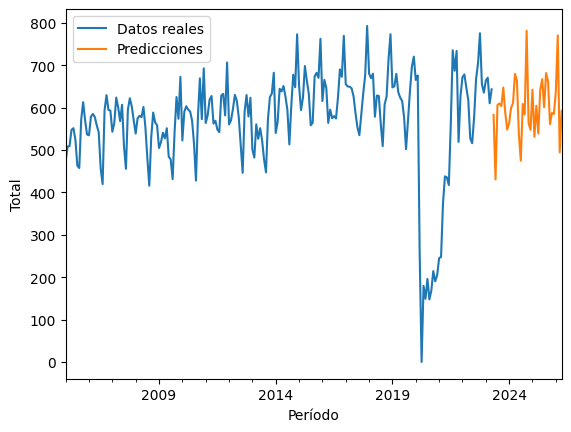

In [719]:
data = pd.DataFrame({'Datos reales': df_pernoctaciones['Total'], 'Predicciones': pd.Series(y_pred_cortado, index=pd.date_range(start=df_pernoctaciones.index[-1], periods=len(y_pred_cortado)+1, freq='MS')[1:])})
data.plot()
plt.xlabel('Período')
plt.ylabel('Total')
plt.show()